# **FÍSICA BÁSICA COM PYTHON**

## AULA 2

* Movimento em Duas e Três Dimensões;
* Introdução ao Python;

## Lançamento Oblíquo

### Conceitos

<p>O movimento oblíquo é um movimento em 2D, resultante da combinação dos movimentos nas direções <i>x</i> e  <i>y</i>.</p>

<p> Vetor posição: $$\vec{r}(t) = x(t) \hat{i} + y(t) \hat{j}$$</p>

<p> Vetor Velocidade: $$\vec{v}(t) = \frac{\mathrm{d} \vec{r}}{\mathrm{d}t} = v_{x}\hat{i} + v_{y}\hat{j}$$ </p>

<p>Vetor aceleração: $$\vec{a}(t) = \frac{\mathrm{d}\vec{v}}{dt} = a_{x}\hat{i} + a_{y}\hat{j} $$</p>

<p>Considerações:</p>
<p>Comportamento na direção <i>x</i>.</p>
<p>$$\begin{cases}
a_{x} = 0 \\
v_{x} = v_{xi} \\
x = x_{i} + v_{xi}t
\end{cases}
$$</p>
<p>Comportamento na direção <i>y</i>.</p>
<p>$$\begin{cases}
a_{y} = -g \\
v_{y} = v_{yi} - gt \\
y = y_{i} + v_{yi}t - \frac{1}{2}gt^2
\end{cases}
$$</p>
<p>O sinal da aceleração gravitacional é negativo porque o marco zero do referencial é no solo e o eixo <i>y</i> cresce para cima.</p>


Equação da trajetória em um Lançamento Oblíquo 
$$\begin{cases}
v_{xi} = v_{i} \cos\theta\\
v_{yi} = v_{i} \sin \theta
\end{cases}$$
<p>Combinando-se as equações das posições x e y excluindo o tempo t</p>
$$\begin{cases}
x = x_{i} + v_{xi}t \\
y = y_{i} + v_{yi}t - \frac{1}{2}gt^2
\end{cases}$$
<p>obtem-se,</p>
$$\begin{cases}
\displaystyle{t = \frac{\Delta x}{v_{xi}}} \\
\displaystyle{y = y_{i} + v_{yi} \left(\frac{\Delta x}{v_{xi}}\right) - \frac{1}{2}g\left(\frac{\Delta x}{v_{xi}}\right)^2}
\end{cases}$$
<p>assim,</p>
$$\begin{cases}
\displaystyle{t = \frac{\Delta x}{v_{xi}}} \\
\displaystyle{y = y_{i} + \tan \theta \Delta x - \frac{1}{2}g\left(\frac{\Delta x}{v_{i}\cos \theta}\right)^2}
\end{cases}$$
<p>Identidades importantes</p>
$$\cos^{2} \theta + \sin^{2} \theta = 1$$
$$\sec^{2} \theta = \tan^{2} \theta + 1$$

## Simulando em Python

In [9]:
from vpython import*

In [11]:
cena = canvas(width=300, height=300, center=vector(10,10,0), title='Referencial e Movimento') 

pxi = 0
pyi = 0
vi = 15
ang = 30
py = pyi

p1 = sphere(pos = vector(pxi,pyi,0), radius = 0.5, make_trail = True, trail_radius=0.1)
ex = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(20,0,0), shaftwidth=0.2, color = color.red ) 
ey = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(0,20,0), shaftwidth=0.2, color = color.blue )

gr = graph(width=400, height=400, title='Trajetória da partícula',foreground=color.white, background=color.black)
g1 = gcurve(graph=gr)

t = 0
dt = 0.001

while t <= 5:
    if py >= 0:
        rate(100)       
        vxi = vi*cos(radians(ang))
        vyi = vi*sin(radians(ang))

        px = pxi + vxi*t
        py = pyi + vyi*t - 0.5*9.8*t**2
        
        g1.plot(px,py,color=color.cyan)
        
        p1.pos = vector(px,py,0)
        t = t + dt
        #label(canvas = cena, pos = vec(10,-4,0), box = False, text='(t,px,py)=({:.1f},{:.1f},{:.1f})'.format(t,px,py))
    else:
        label(canvas = cena, pos = vec(10,-4,0), box = False, text='(t,px,py)=({:.1f},{:.1f},{:.1f})'.format(t,px,py))
        label(canvas = cena, pos=vec(10,-10,0), box=False,text='A partícula atingiu o solo!')
        break


<IPython.core.display.Javascript object>

In [13]:
from vpython import*

cena = canvas(title='Lançamento Oblíquo', width=800, height=400,
     center=vector(10,5,5), autoscale = False)
     
ex = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(30,0,0), shaftwidth=0.1)
ey = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(0,10,0), shaftwidth=0.1)
#ez = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(0,0,20), shaftwidth=0.1)

ball = sphere(pos=vector(0,0,0), radius=0.5, color=color.yellow, make_trail=True, trail_radius = 0.1)
pointer = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(0,0,0), shaftwidth=0.1, color=color.blue)

pox = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(0,0,0), shaftwidth=0.1, color=color.red)
poy = arrow(canvas = cena, pos=vector(0,0,0), axis=vector(0,0,0), shaftwidth=0.1, color=color.red)


t = 0
dt = 0.001
vi = 20
xi = 0
yi = 0
ang = radians(30)


while t <= 20:
    rate(300)
    
    if (ball.pos.y >= 0 ):

        ball.pos.x = xi + vi*cos(ang)*t
        ball.pos.y = yi + vi*sin(ang)*t - 4.9*t**2
    
        pointer.pos.x = ball.pos.x
        pointer.pos.y = ball.pos.y
        
        pox.pos.x = ball.pos.x
        pox.pos.y = ball.pos.y
         
        poy.pos.x = ball.pos.x
        poy.pos.y = ball.pos.y
        
        
        vx = vi*cos(ang)
        vy = vi*sin(ang)-9.8*t
        
        pox.axis.x = vx
        poy.axis.y = vy
        
        
        pointer.axis.x = vx
        pointer.axis.y = vy
        
        t += dt
    
    else:
        label( pos=vec(0,-5,0), text='Atingiu o solo!' , box = False)
        label( pos=vec(0,-6,0), text='R = {:.1f}'.format(ball.pos.x) , box = False)
        label( pos=vec(0,-7,0), text='t = {:.2f}'.format(t) , box = False)
        

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

<p>Comportamento da derivada e integral. 

<p>No Geogebra, defina os valores iniciais do problema.</p>


* Dê valores para <i>x<sub>i</sub></i>, <i>v<sub>i</sub></i> e <i>a</i>;
* Crie a variável <i>n</i> que será utilizada para indicar o número dos retângulos na integral;
* Considere a função: 


<p>$$f(t) = x_{i}+v_{i}t+\frac{1}{2}at^2$$</p>

* Considerando a derivada da função <i>f(t)</i>

$$f'(t) = v_{i} + at$$

* Dado o ponto (t<sub>0</sub>,x<sub>0</sub>), a reta tangente a este ponto é dada por:

$$r(t) = (t-t_{0})f'(t_{0})+x_{0}$$

* Utilize o comando SomaDeRiemanÀEsquerda(f(t),t<sub>0</sub>,t<sub>f</sub>,n), para desenhar a área abaixo da curva.

In [3]:
%%HTML
<iframe src="https://www.geogebra.org/classic?lang=pt" height="400" width="800" title="Iframe Example"></iframe>

### Exercícios

1º) Um desordeiro joga uma pedra verticalmente
para baixo com uma velocidade inicial de 12 m/s, a
partir do telhado de um edifício, 30,0 m acima do solo.
Quanto tempo leva a pedra para atingir o solo?

<p>Considere a equação abaixo;</p>
$$v_{f}^2 = v_{i}^2 - 2g\Delta y$$
<p>Se considerarmos a origem do sistema de referência no solo, tem-se que</p>
$$\Delta y = y_{f} - y_{i}$$
<p>A posição inicial do lançamento vertical é $y_{i} = 30m$ e a posição final do lançamento é $y_{f} = 0$, logo</p>
$$v_{f}^2 = (12)^2 - 2\cdot 9.8 \cdot (0 - 30)$$
$$v_{f} = 27 m/s$$
<p>Com a velocidade final é possível determinar o tempo do movimento da partícula, usamos</p>
$$v_{f} = v_{i} - gt$$
<p>Precisamos tomar cuidado com os sinais da velocidades da partícula, no nosso referencial, as velocidades são negativas, assim</p>
$$v_{f} = v_{i} - gt$$
$$ -27 = -12 -9.8t$$
$$t = \frac{-27+12}{-9.8}$$
$$t = 1,53s$$

2º) Um projétil é lançado do ar do topo de um
rochedo situado a 200 m acima de um vale. Sua
velocidade inicial é de 60 m/s a um ângulo de 60° acima
da horizontal. Em que ponto o projétil atinge o solo?
<img src='imgs/exerc_03.png' width='300'/>

3º) Um triturador foi projetado para ejetar lascas a
uma velocidade inicial 𝑣<sub>0</sub> = 7,62 𝑚/𝑠, como mostrado
na figura. Se o tubo é inclinado de 300 em relação à
horizontal, determine a altura ℎ da pilha onde as lascas
se depositam. A distância horizontal de A à saída do
tubo em 𝑂 é de 6,1 𝑚.
<img src='imgs/exerc_02.png' width='300'/>

## Introdução ao Python

As principais bibliotecas utilizadas em Física, Engenharia e Matemática são: Numpy e Matplotlib

<p>Pode-se instalar a bliblioteca Numpy por meio do PIP.</p>
<p>* pip install numpy</p>
<p>Pode-se instalar a biblioteca Matplotlib por meio do PIP</p>
<p>* python -m pip install -U pip</p>
<p>* python -m pip install -U matplotlib</p>
<p>Dependendo da instalação e do sistema operacional, altere de python para python3.</p>

### Importando as bibliotecas e construindo gráficos

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definindo as funções (variável independente,variável dependente)

In [6]:
A = 10
Tp = 2
O = 180
w = 2 * np.pi/Tp
t = np.arange(0.0, 4.0, 0.01)
s = A*np.cos(w * t + np.radians(O))
v = -A*w*np.sin(w*t + np.radians(O))

Construção do gráfico

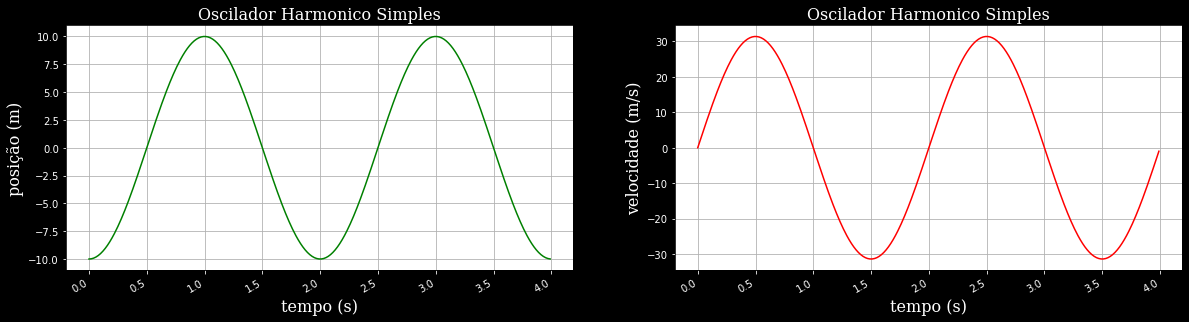

In [7]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5),facecolor='black')
ax1.plot(t, s,color='g') #{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
ax1.set_title('Oscilador Harmonico Simples',fontdict=font)
ax1.set_xlabel('tempo (s)', fontdict=font)
ax1.set_ylabel('posição (m)', fontdict=font)
ax1.tick_params(colors='white')
ax1.grid()

ax2.plot(t, v,color='r') #{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
ax2.set_title('Oscilador Harmonico Simples',fontdict=font)
ax2.set_xlabel('tempo (s)', fontdict=font)
ax2.set_ylabel('velocidade (m/s)', fontdict=font)
ax2.tick_params(colors='white')
ax2.grid()

fig.autofmt_xdate() #Ajuste automático 

plt.show()

### Exercício de Simulação em Vpython

<p>Utilize as bibliotecas acima.</p>
4º) Uma metralhadora está situada no topo de um rochedo a uma altura de 120 𝑚 de uma estrada
horizontal. Ela dispara um projétil com velocidade de 200 𝑚/𝑠, a um ângulo de 30° acima da
horizontal. (a) Calcular a que distância D do rochedo cairá o projétil. (b) Um carro avança pela estrada diretamente para o rochedo a 10 𝑚/𝑠, distante 3946 𝑚 do penhasco. (c) Construa os gráficos que descrevem os movimentos dos dois projéteis.
<img src='imgs/exerc_04.png' width='300'/>

Para representar a partícula desenhe uma esfera e para representar o carro desenhe uma caixa.

$\to$ $\gets$